In [1]:
# Import statements
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from IPython.display import Image
from IPython.core.display import HTML 

# Modules defined in the My_Functions.py file
#from My_Functions import *
#np.set_printoptions(precision=3)
# Import 3 functions.

def eda_nans(df):
    """
    Returns a dataframe with details on how many NaNs in a given dataframe
    :param df: dataframe
    :return: NaN dataframe
    """
    temp_df = pd.DataFrame(columns=df.columns,
                           index=["total", "percentage"])
    for col in df.columns:
        idxes = df[col].isnull()
        num_nans = idxes.sum(axis = 0)
        nan_pct = 100*np.round(num_nans/df.shape[0], 3)
        temp_df[col] = [num_nans, nan_pct]
    return temp_df

def eda_unique(df):
    """
    Describes all the unique elements in columns in a dataframe
    :param df: Dataframe
    :return: prints number of unique elements in each column and prints the unique values if no. of unique values is <=50
    """
    for col in df.columns:
        print("Column name : ", col)
        unique_elems = pd.unique(df[col])
        print("        Number of unique elems : ", len(unique_elems))
        if len(unique_elems) == df.shape[0]:
            print("        All values are unique.")
        else:
            if len(unique_elems)>50:
                print("        Too many unique values to print")
            else:
                print("        Unique values : ", unique_elems)

def proc_cleanup (df, col, cleanup_vals, nan_cond=True, na_fill_val=-1):
    """
    Replaces values in a given column in a dataframe with desired values
    Used to convert text fields into numeric categorical fields
    :param df: Dataframe
    :param col: Column in the dataframe that needs to be cleaned
    :param cleanup_vals: pairs of to-be replaced and new values in {}
    :param nan_cond: if nulls need to be replaced with another value, default = True
    :param na_fill_val: the value nulls will be replaced with if nan_cond is true, default= -1
    :return: updated dataframe
    """
    cleanup_vals_new={col:cleanup_vals}
    df.replace(cleanup_vals_new, inplace=True)
    if nan_cond:
        df[col]=df[col].fillna(na_fill_val)
        return





# Make sure we can see the whole dataset and not a subset
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Make the notebook fill 100% of browser width.
display(HTML("<style>.container { width:100% !important; }</style>"))

#Setting working directory
#os.chdir("../Data Mining Course Project")

In [5]:
#reading the data
train_data = pd.read_csv('crp_data.csv')
#test_data = pd.read_csv('test.csv')

In [6]:
#checking for missing values
eda_nans(train_data).transpose()

,total,percentage
household_id,0.0,0.0
id,0.0,0.0
rent_monthly,0.0,0.0
bedrooms_overcrowding,0.0,0.0
rooms,0.0,0.0
rooms_overcrowding,0.0,0.0
has_toilet,0.0,0.0
has_fridge,0.0,0.0
tablets_owned_count,0.0,0.0
males_under_12,0.0,0.0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Columns: 120 entries, household_id to mean_age
dtypes: float64(4), int64(114), object(2)
memory usage: 2.7+ MB


In [5]:
#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [9]:
target_values = train_data['target'].value_counts()
target_values = pd.DataFrame(target_values)
target_values['Household_type'] = target_values.index
target_values

,target,Household_type
4,1954,4
2,442,2
3,355,3
1,222,1


In [10]:
mappy = {4: "NonVulnerable", 3: "Moderate Poverty", 2: "Vulnerable", 1: "Extereme Poverty"}
target_values['Household_type'] = target_values.Household_type.map(mappy)
target_values

,target,Household_type
4,1954,NonVulnerable
2,442,Vulnerable
3,355,Moderate Poverty
1,222,Extereme Poverty


Train dataset has 9557 entries, while test has 23856 entries.  Train has 1 extra column than test.

Plot to see the distribution of Poverty level:

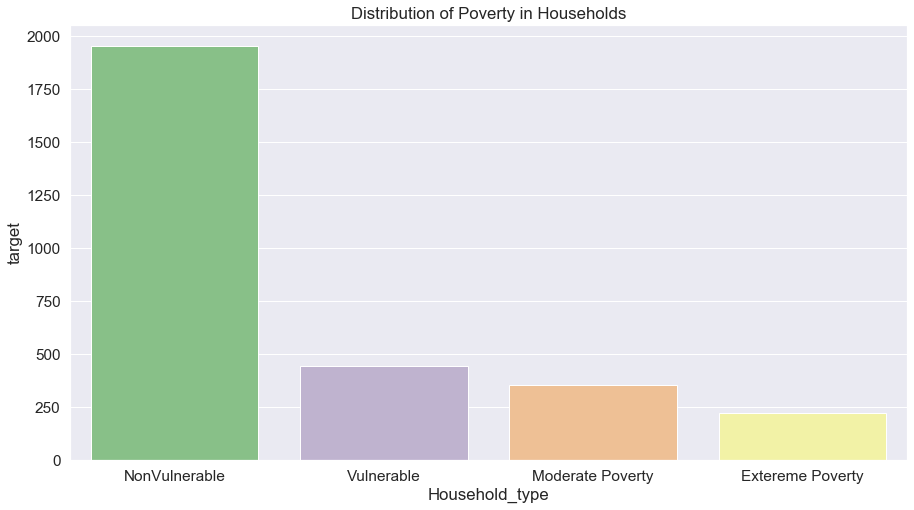

In [12]:
sns.set( font_scale=1.4)
fig = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x = 'Household_type', y = 'target', data = target_values, palette='Accent', ci = None).set_title('Distribution of Poverty in Households')

The majority of the dataset is Non vulnerable; As poverty increases, the population decreases. One thing to pay attention is that the dataset is imbalanced. 

In [13]:
#Finding Correlations between variables.

corrs = train_data.corr().abs()
corrs1 = corrs.unstack().drop_duplicates()
strongest = corrs1.sort_values(kind="quicksort", ascending = False)
strongest1 = pd.DataFrame(strongest)
temp = strongest1.index.values
first_cols = [i[0] for i in temp]
second_cols = [j[1] for j in temp]
total_cols_corr = list(set(first_cols[:20] + second_cols[:20]))
strongest.head(25)

rent_monthly      rent_monthly        1.000000
persons_total     household_size      0.996884
elec_public       elec_coop           0.974788
toilet_sewer      toilet_septank      0.944550
water_inside      water_outside       0.939798
persons_total     total_household     0.929237
total_household   household_size      0.926667
energ_cook_elec   energ_cook_gas      0.901768
males_over_12     males_total         0.850786
females_over_12   females_total       0.846988
persons_over_12   persons_total       0.842055
                  household_size      0.837013
trash_truck       trash_burn          0.829835
age               mean_age            0.828887
persons_over_12   total_adults        0.822385
floor_tile        floor_cement        0.807326
schooling         mean_edu            0.803793
qualwall_reg      qualwall_good       0.800283
roof_metal        roof_cement         0.799179
qualfloor_reg     qualfloor_good      0.793357
rooms             bedrooms            0.786699
persons_under

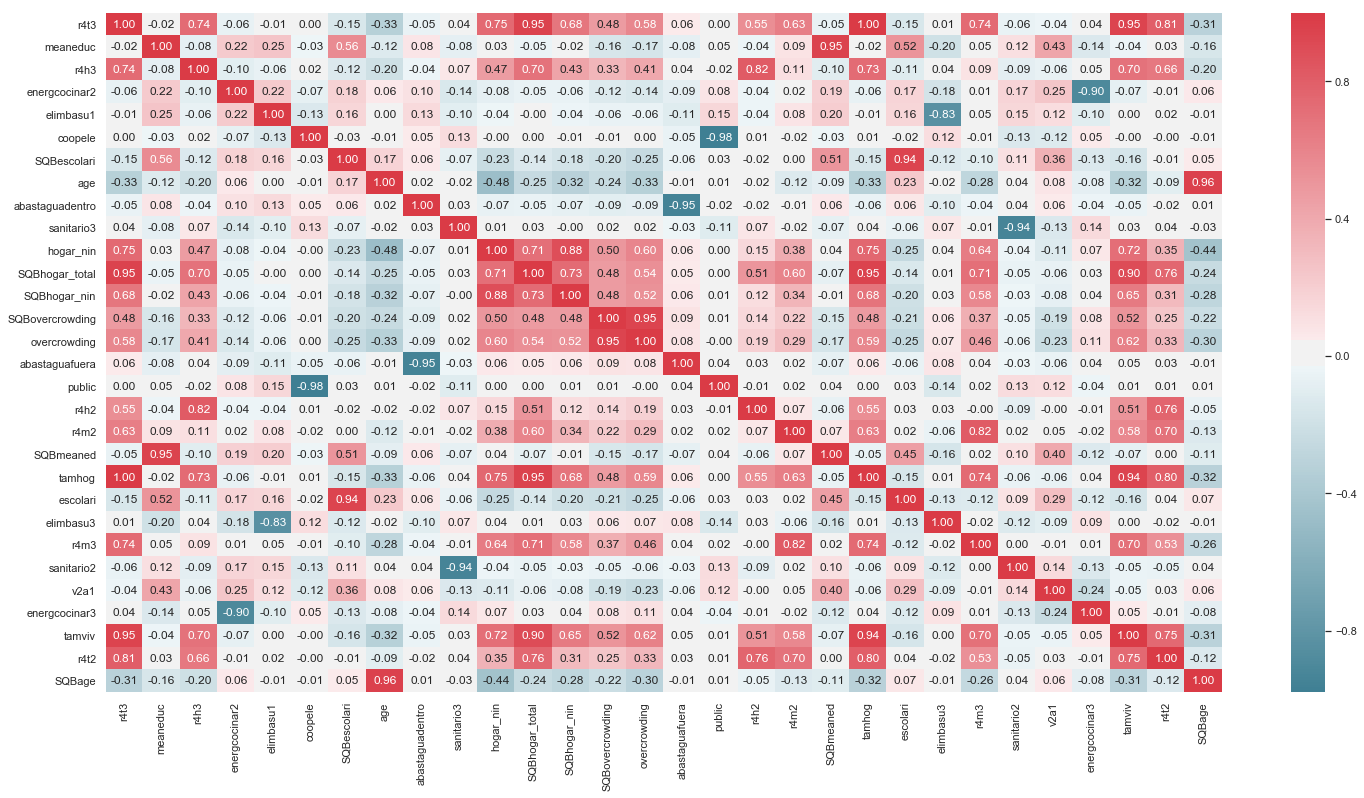

In [10]:
# Plot Correlations by using heatmap
corr = train_data[total_cols_corr].corr()
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(25, 12.5))
sns.heatmap(corr, cmap=cmap, annot=True, ax=ax, fmt='.2f')

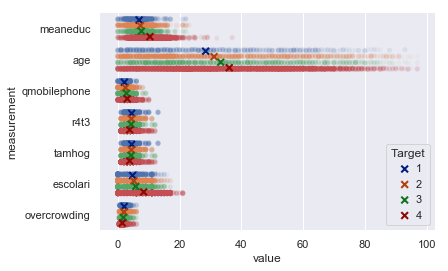

In [11]:
#Select high correlation components and do visualization of feature importance of XGB below


valuez = ['meaneduc', 'age', 'qmobilephone','Target', 'r4t3', 'tamhog', 'escolari', 'overcrowding']
tra = pd.melt(train_data[valuez], "Target", var_name="measurement")
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
sns.stripplot(x="value", y="measurement", hue="Target",
              data=tra, dodge=True, jitter=True,
              alpha=.05, zorder=1)
sns.pointplot(x="value", y="measurement", hue="Target",
              data=tra, dodge=.532, join=False, palette="dark",
              markers="x", scale=1, ci=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title="Target",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=1, frameon=True)

In [12]:
# v2a1 (Monthly rent payment) has 71.8% data missing 
# assigning v2a1 = 0 if it is missing for people who own a house (tipovivi1 =1)
train_data.loc[(train_data["tipovivi1"]==1),"v2a1"] = 0

In [13]:
train_data[train_data["v2a1"].isnull()].shape[0]

949

In [14]:
# v18q1 (number of tablets household owns) has 76.8% data missing
# assigning it as 0 as they might be individuals who don't own any tablets - this can be checked by v18q=0
print(train_data.loc[(train_data["v18q"]==0)].shape[0])
print(sum(train_data.loc[(train_data["v18q"]==0), "v18q1"].isnull())) # all v18q1 values are null for v18q=0
# we can replace nulls in "v18q1 with 0s and drop column v18q as it will now provide the same information as v18q1
train_data.loc[(train_data["v18q"]==0), "v18q1"] = 0

7342
7342


In [15]:
# rez_esc (Years behind in school) has 83% missing data
# we can drop the column
train_data["rez_esc"].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [16]:
# meaneduc has 0.1% missing data
train_data.loc[(train_data["meaneduc"].isnull())]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
1291,ID_bd8e11b0f,0.0,0,7,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,10,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1b31fd159,1,0,0,1,8,no,10,NaN,0,0,0,1,0,0,0,0,0,5,0.2,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,18,100,324,1,0,1,0.04,64.0,NaN,324,4
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,6,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8,4,no,NaN,0,0,1,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,36,324,4,16,4,4.00,64.0,NaN,324,4
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,4,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8,4,no,NaN,0,1,0,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,16,324,4,16,4,4.00,64.0,NaN,324,4
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,faaebf71a,2,0,0,2,8,12,no,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,faaebf71a,2,0,0,2,8,12,no,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4


In [17]:
# dropping columns we dont need
train_data.drop(columns=['dependency', \
                         #num of dependents div by num of adults - have variables that give us this info already
                         'tamhog', \
                         # size of household - same as hhsize
                         'v18q', \
                         # gives same info as v18q1
                         'edjefe', 'edjefa', \
                         # based on the interaction of escolari (years of education), head of household and gender - all variables already in the dataset
                         'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', \
                         # education variables already in the dataset
                         'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', \
                         # squared variables
                         'rez_esc' \
                         # lots of missing
                        ], inplace=True)

In [18]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,1,0,0,0,0,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,10.0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,1,0,0,0,0,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,12.0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,0,0,0,1,1,0,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,11.0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,0,2,2,1,1,2,1,3,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,11.0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,0,2,2,1,1,2,1,3,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,11.0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4


In [19]:
# Grouping by household (idhogar)
# creating two new columns - dis_cnt= number of disabled people in the house; mean_age = mean age of the household
train_data_age_agg = train_data.groupby("idhogar").mean()["age"]
train_data_age_agg = pd.DataFrame(train_data_age_agg)
train_data_dis_agg = train_data.groupby("idhogar").sum()["dis"]
train_data_dis_agg = pd.DataFrame(train_data_dis_agg)

In [20]:
print(train_data_age_agg.shape)
print(train_data_dis_agg.shape)

(2988, 1)
(2988, 1)


In [21]:
train_data.drop(columns=["dis"], inplace=True)

In [22]:
train_data.shape

(9557, 118)

In [23]:
train_data=train_data.merge(train_data_age_agg, how="inner", left_on = "idhogar", right_on="idhogar")
train_data=train_data.merge(train_data_dis_agg, how="inner", left_on = "idhogar", right_on="idhogar")

In [24]:
train_data.shape

(9557, 120)

In [25]:
train_data_hh = train_data[train_data["parentesco1"]==1]
print(train_data_hh.shape) # drop of 15 households as they do not have a head of household - we explored these records and noticed they were households with only minors
train_data_hh.head()

(2973, 120)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age_x,Target,age_y,dis
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,1,0,0,0,0,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,10.0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4,43.0,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,1,0,0,0,0,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,12.0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,67.0,0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,0,0,0,1,1,0,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,11.0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4,92.0,1
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1.0,0,2,2,1,1,2,1,3,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,11.0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,4,25.0,0
8,ID_1284f8aad,130000.0,1,2,0,1,1,0.0,0,1,1,2,1,3,2,2,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,10.0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,4,19.0,0


In [26]:
#  renaming columns 
old_names = ["idhogar","Id", "v2a1", "hacdor", "rooms", "hacapo", "v14a", "refrig", "v18q1", "r4h1", "r4h2", "r4h3", "r4m1", "r4m2", "r4m3", "r4t1", "r4t2", "r4t3", "tamviv", "escolari", "hhsize", "paredblolad", "paredzocalo", "paredpreb", "pareddes", "paredmad", "paredzinc", "paredfibras", "paredother", "pisomoscer", "pisocemento", "pisoother", "pisonatur", "pisonotiene", "pisomadera", "techozinc", "techoentrepiso", "techocane", "techootro", "cielorazo", "abastaguadentro", "abastaguafuera", "abastaguano", "public", "planpri", "noelec", "coopele", "sanitario1", "sanitario2", "sanitario3", "sanitario5", "sanitario6", "energcocinar1", "energcocinar2", "energcocinar3", "energcocinar4", "elimbasu1", "elimbasu2", "elimbasu3", "elimbasu4", "elimbasu5", "elimbasu6", "epared1", "epared2", "epared3", "etecho1", "etecho2", "etecho3", "eviv1", "eviv2", "eviv3", "male", "female", "estadocivil1", "estadocivil2", "estadocivil3", "estadocivil4", "estadocivil5", "estadocivil6", "estadocivil7", "parentesco1", "parentesco2", "parentesco3", "parentesco4", "parentesco5", "parentesco6", "parentesco7", "parentesco8", "parentesco9", "parentesco10", "parentesco11", "parentesco12", "hogar_nin", "hogar_adul", "hogar_mayor", "hogar_total", "meaneduc", "bedrooms", "overcrowding", "tipovivi1", "tipovivi2", "tipovivi3", "tipovivi4", "tipovivi5", "computer", "television", "mobilephone", "qmobilephone", "lugar1", "lugar2", "lugar3", "lugar4", "lugar5", "lugar6", "area1", "area2", "age_x", "Target", "dis", "age_y"]
new_names = ["household_id", "id", "rent_monthly", "bedrooms_overcrowding", "rooms", "rooms_overcrowding", "has_toilet", "has_fridge", "tablets_owned_count", "males_under_12", "males_over_12", "males_total", "females_under_12", "females_over_12", "females_total", "persons_under_12", "persons_over_12", "persons_total", "total_household", "schooling", "household_size", "walls_brick", "walls_socket", "walls_prefab", "walls_waste", "walls_wood", "walls_zinc", "walls_natural", "walls_other", "floor_tile", "floor_cement", "floor_other", "floor_natural", "floor_na", "floor_wood", "roof_metal", "roof_cement", "roof_natural", "roof_other", "has_cieling", "water_inside", "water_outside", "water_na", "elec_public", "elec_private", "elec_na", "elec_coop", "toilet_na", "toilet_sewer", "toilet_septank", "toilet_latrine", "toilet_other", "energ_na", "energ_cook_elec", "energ_cook_gas", "energ_cook_wood", "trash_truck", "trash_buried", "trash_burn", "trash_dump", "trash_water", "trash_other", "qualwall_bad", "qualwall_reg", "qualwall_good", "qualroof_bad", "qualroof_reg", "qualroof_good", "qualfloor_bad", "qualfloor_reg", "qualfloor_good", "male", "female", "ec_under_10", "ec_free_union", "ec_married", "ec_divorced", "ec_separated", "ec_widow/er", "ec_single", "pc_house_head", "pc_spouse", "pc_child", "pc_stepchild", "pc_child_inlaw", "pc_grandchild", "pc_parent", "pc_parent_inlaw", "pc_sibling", "pc_sibling_inlaw", "pc_fam_other", "pc_nonfam_other", "total_children", "total_adults", "total_seniors", "total_members", "mean_edu", "bedrooms", "overcrowding", "house_own", "house_mortgage", "house_rent", "house_prec", "house_other", "has_computer", "has_television", "has_mobileph", "total_mobileph", "reg_central", "reg_chorotega", "reg_paccentral", "reg_brunca", "reg_huetaratl", "reg_huetarnor", "zone_urban", "zone_rural", "age", "target", "dis_cnt", "mean_age"]
dict_names = dict(zip(old_names,new_names))
train_data_hh = train_data_hh.rename(columns=dict_names)

In [27]:
print(train_data_hh.shape)
train_data_hh.head()

(2973, 120)


,id,rent_monthly,bedrooms_overcrowding,rooms,rooms_overcrowding,has_toilet,has_fridge,tablets_owned_count,males_under_12,males_over_12,males_total,females_under_12,females_over_12,females_total,persons_under_12,persons_over_12,persons_total,total_household,schooling,household_size,walls_brick,walls_socket,walls_prefab,walls_waste,walls_wood,walls_zinc,walls_natural,walls_other,floor_tile,floor_cement,floor_other,floor_natural,floor_na,floor_wood,roof_metal,roof_cement,roof_natural,roof_other,has_cieling,water_inside,water_outside,water_na,elec_public,elec_private,elec_na,elec_coop,toilet_na,toilet_sewer,toilet_septank,toilet_latrine,toilet_other,energ_na,energ_cook_elec,energ_cook_gas,energ_cook_wood,trash_truck,trash_buried,trash_burn,trash_dump,trash_water,trash_other,qualwall_bad,qualwall_reg,qualwall_good,qualroof_bad,qualroof_reg,qualroof_good,qualfloor_bad,qualfloor_reg,qualfloor_good,male,female,ec_under_10,ec_free_union,ec_married,ec_divorced,ec_separated,ec_widow/er,ec_single,pc_house_head,pc_spouse,pc_child,pc_stepchild,pc_child_inlaw,pc_grandchild,pc_parent,pc_parent_inlaw,pc_sibling,pc_sibling_inlaw,pc_fam_other,pc_nonfam_other,household_id,total_children,total_adults,total_seniors,total_members,mean_edu,bedrooms,overcrowding,house_own,house_mortgage,house_rent,house_prec,house_other,has_computer,has_television,has_mobileph,total_mobileph,reg_central,reg_chorotega,reg_paccentral,reg_brunca,reg_huetaratl,reg_huetarnor,zone_urban,zone_rural,age,target,mean_age,dis_cnt
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,1,0,0,0,0,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,10.0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4,43.0,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,1,0,0,0,0,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,12.0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,67.0,0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,0,0,0,1,1,0,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,11.0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4,92.0,1
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1.0,0,2,2,1,1,2,1,3,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,11.0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,4,25.0,0
8,ID_1284f8aad,130000.0,1,2,0,1,1,0.0,0,1,1,2,1,3,2,2,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,10.0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,4,19.0,0


In [28]:
train_data_hh.to_csv("train_data_clean.csv")

In [29]:
Educ = train_data_hh[['mean_edu','target']]
Educ = pd.DataFrame(Educ)

/Users/zhaoserrano/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


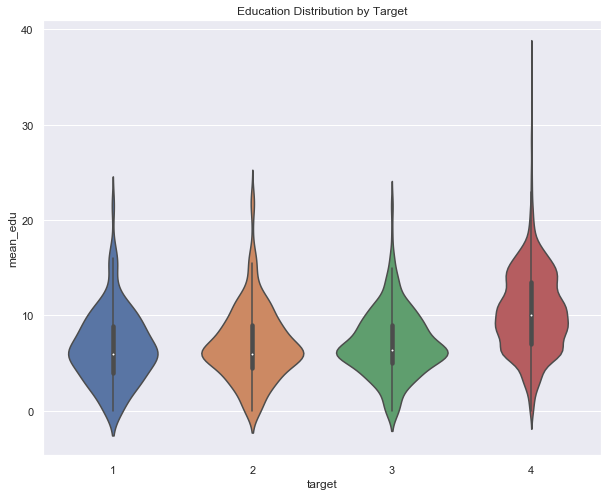

In [30]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'target', y = 'mean_edu', data = Educ);
plt.title('Education Distribution by Target');

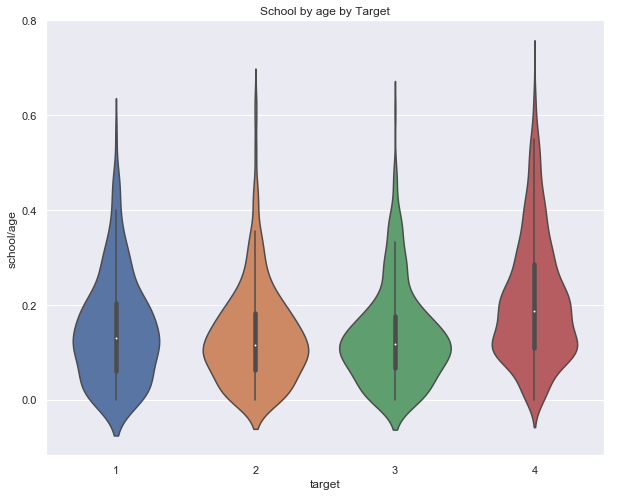

In [31]:
train_data_hh['school/age']=train_data_hh['schooling'] /train_data_hh['age']
plt.figure(figsize = (10, 8))
sns.violinplot('target', 'school/age', data = train_data_hh)
plt.title('School by age by Target');

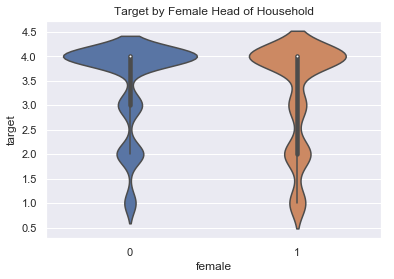

In [32]:
sns.violinplot(x = 'female', y = 'target', data = train_data_hh);
plt.title('Target by Female Head of Household');

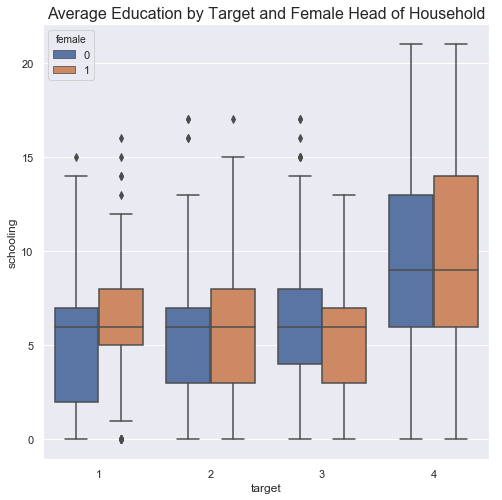

In [33]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'target', y = 'schooling', hue = 'female', data = train_data_hh);
plt.title('Average Education by Target and Female Head of Household', size = 16);

In [34]:
train_data_hh.groupby('female')['schooling'].agg(['mean', 'count'])

,mean,count
female,,
0,8.166298,1810
1,8.122958,1163
